In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [32]:
df = pd.read_csv("dschallenge.csv")
df.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


In [33]:
df.shape

(5000, 7)

In [34]:
df.isna().sum()

order_id          0
shop_id           0
user_id           0
order_amount      0
total_items       0
payment_method    0
created_at        0
dtype: int64

In [35]:
df.shop_id.nunique()

100

In [36]:
df.user_id.nunique()

301

In [37]:
shop_order_df = df[['shop_id','order_amount']].groupby('shop_id',sort=False).sum()
print(shop_order_df['order_amount'].sum() == df['order_amount'].sum())
shop_order_df.describe()


True


,order_amount
count,1.000000e+02
mean,1.572564e+05
std,1.216218e+06
min,6.840000e+03
25%,1.293050e+04
50%,1.488750e+04
75%,1.760000e+04
max,1.199018e+07


In [38]:
shop_item_df = df[['shop_id','total_items']].groupby('shop_id',sort=False).sum()
print(shop_item_df.total_items.sum() == df.total_items.sum())
shop_item_df.describe()

True


,total_items
count,100.000000
mean,439.360000
std,3396.366111
min,67.000000
25%,88.000000
50%,100.000000
75%,111.250000
max,34063.000000


In [44]:
print(df['order_amount'].rolling(window=30).mean().describe())
print(df['order_amount'].rolling(window=20).mean().describe())
print(df['order_amount'].rolling(window=15).mean().describe())
print(df['order_amount'].rolling(window=10).mean().describe())
print(df['order_amount'].rolling(window=5).mean().describe())

count     4971.000000
mean      3095.884664
std       7300.053728
min        215.100000
25%        293.233333
50%        320.666667
75%       1161.833333
max      47219.500000
Name: order_amount, dtype: float64
count     4981.000000
mean      3127.940042
std       9009.244468
min        199.100000
25%        286.200000
50%        315.100000
75%        372.950000
max      70688.900000
Name: order_amount, dtype: float64
count     4986.000000
mean      3153.296791
std      10391.867924
min        194.466667
25%        279.200000
50%        312.733333
75%        362.183333
max      94107.133333
Name: order_amount, dtype: float64
count     4991.000000
mean      3150.381206
std      12804.680015
min        172.800000
25%        270.600000
50%        308.200000
75%        356.200000
max      75804.200000
Name: order_amount, dtype: float64
count      4996.000000
mean       3147.455564
std       18304.664983
min         136.800000
25%         254.400000
50%         301.600000
75%         358.40

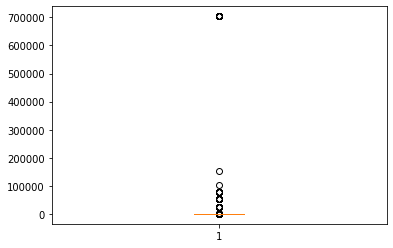

<Figure size 7200x7200 with 0 Axes>

In [52]:
plt.boxplot(df['order_amount'])
fig = plt.figure(figsize =(100,100 ))
plt.show()